## About FlipitNews:
The Gurugram-based company ‘FlipItNews’ aims to revolutionize the way Indians perceive finance, business, and capital market investment, by giving it a boost through artificial intelligence (AI) and machine learning (ML). They’re on a mission to reinvent financial literacy for Indians, where financial awareness is driven by smart information discovery and engagement with peers. Through their smart content discovery and contextual engagement, the company is simplifying business, finance, and investment for millennials and first-time investors.

## Objective:
The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.



In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import re

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import string

from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
#Loading dataset
df = pd.read_csv("flipitnews-data.csv")

In [4]:
df

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,Business,cars pull down us retail figures us retail sal...
2221,Politics,kilroy unveils immigration policy ex-chatshow ...
2222,Entertainment,rem announce new glasgow concert us band rem h...
2223,Politics,how political squabbles snowball it s become c...


In [5]:
df.shape

(2225, 2)

We can see there are 2225 rows and 2 columns in our dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [7]:
df.isnull().sum()

Category    0
Article     0
dtype: int64

No null values are present in our dataset

In [8]:
df['Category'].value_counts()

Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: Category, dtype: int64

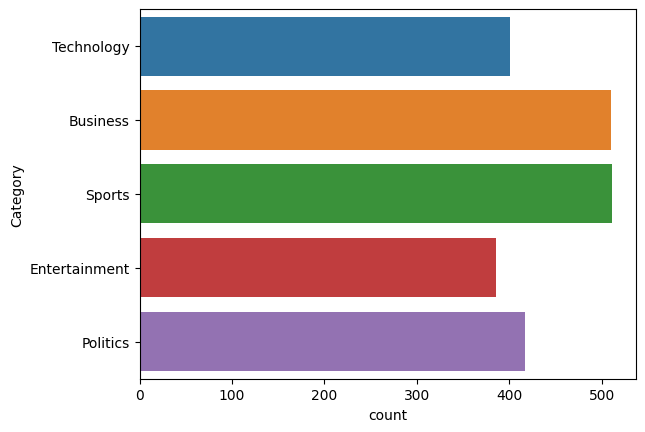

In [9]:
sns.countplot(y = 'Category', data = df)
plt.show()

In [11]:
def preprocessing(text):
    regex = re.compile('[^a-zA-Z ]')
    #First parameter is the replacement, second parameter is your input string
    text = regex.sub('', text)
    text = word_tokenize(text)
    text  = [token for token in text if token not in set(string.punctuation)]
    text = [token for token in text if token.lower() not in stopwords.words('english')]

    lem = WordNetLemmatizer()
    text = [lem.lemmatize(token).lower() for token in text]
    return ' '.join(text)


In [12]:
#First article display
df["Article"][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [13]:
#First article after processing
preprocessing(df["Article"][0])

'tv future hand viewer home theatre system plasma highdefinition tv digital video recorder moving living room way people watch tv radically different five year time according expert panel gathered annual consumer electronics show la vega discus new technology impact one favourite pastime u leading trend programme content delivered viewer via home network cable satellite telecom company broadband service provider front room portable device one talkedabout technology ce digital personal video recorder dvr pvr settop box like u tivo uk sky system allow people record store play pause forward wind tv programme want essentially technology allows much personalised tv also builtin highdefinition tv set big business japan u slower take europe lack highdefinition programming people forward wind advert also forget abiding network channel schedule putting together alacarte entertainment u network cable satellite company worried mean term advertising revenue well brand identity viewer loyalty chann

In [14]:
#Encoding the traget variable 'Category'
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [15]:
df

,Category,Article
0,4,tv future in the hands of viewers with home th...
1,0,worldcom boss left books alone former worldc...
2,3,tigers wary of farrell gamble leicester say ...
3,3,yeading face newcastle in fa cup premiership s...
4,1,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,0,cars pull down us retail figures us retail sal...
2221,2,kilroy unveils immigration policy ex-chatshow ...
2222,1,rem announce new glasgow concert us band rem h...
2223,2,how political squabbles snowball it s become c...


In [16]:
#Processing all articles
df["Article"] = df["Article"].apply(lambda x : preprocessing(x))

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

### Fuction to extract features with the option to choose among binary, BOW and TF-IDF techniques:

In [18]:
def extract_features(df,field,training_data,testing_data,type="binary"):
    """Extract features using different methods"""


    if "binary" in type:

        # BINARY FEATURE REPRESENTATION
        cv= CountVectorizer(binary=True, max_df=0.95)
        cv.fit_transform(training_data[field].values)

        train_feature_set=cv.transform(training_data[field].values)
        test_feature_set=cv.transform(testing_data[field].values)

        return train_feature_set,test_feature_set,cv

    elif "counts" in type:

        # COUNT BASED FEATURE REPRESENTATION
        cv= CountVectorizer(binary=False, max_df=0.95)
        cv.fit_transform(training_data[field].values)

        train_feature_set=cv.transform(training_data[field].values)
        test_feature_set=cv.transform(testing_data[field].values)

        return train_feature_set,test_feature_set,cv

    else:

        # TF-IDF BASED FEATURE REPRESENTATION
        tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
        tfidf_vectorizer.fit_transform(training_data[field].values)

        train_feature_set=tfidf_vectorizer.transform(training_data[field].values)
        test_feature_set=tfidf_vectorizer.transform(testing_data[field].values)

        return train_feature_set,test_feature_set,tfidf_vectorizer

### Spliting the data into train and test:
Using the counts here for text processing

In [19]:
training_data, testing_data = train_test_split(df,random_state = 2000, test_size = 0.25)

# GET LABELS
Y_train=training_data['Category'].values
Y_test=testing_data['Category'].values

# GET FEATURES
X_train,X_test,feature_transformer=extract_features(df,"Article",training_data,testing_data, type="counts")

In [20]:
training_data.shape

(1668, 2)

In [21]:
testing_data.shape

(557, 2)

## Logistic Regrssion Model:

In [22]:
log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
model = log_reg.fit(X_train,Y_train)

[LibLinear]

In [23]:
Y_pred = model.predict(X_test)

Confusion matrix:
[[129   3   3   0   1]
 [  1  89   1   0   1]
 [  3   0  93   0   0]
 [  1   0   0 122   0]
 [  4   0   1   2 103]]
Classification report:
               precision    recall  f1-score   support

     Buisness       0.93      0.95      0.94       136
Entertainment       0.97      0.97      0.97        92
     Politics       0.95      0.97      0.96        96
       Sports       0.98      0.99      0.99       123
   Technology       0.98      0.94      0.96       110

     accuracy                           0.96       557
    macro avg       0.96      0.96      0.96       557
 weighted avg       0.96      0.96      0.96       557







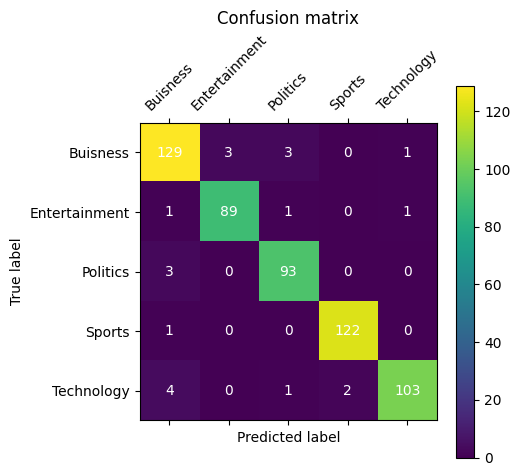

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)



print('Confusion matrix:')
print(cm)

# Print the classification report
class_names = ['Buisness','Entertainment','Politics','Sports','Technology']
report = classification_report(Y_test, Y_pred, target_names=class_names)
print('Classification report:')
print(report)
print()
print()
print()
print()


# Plot confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

# Add text annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()

## Naive Bayes Model:

In [25]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB();
model2 = gnb.fit(X_train.toarray(), Y_train)

In [26]:
Y_pred = model2.predict(X_test.toarray())

Confusion matrix:
[[112   3   7   2  12]
 [  3  83   0   0   6]
 [  6   1  89   0   0]
 [  1   2   2 117   1]
 [  4   1   1   0 104]]
Classification report:
               precision    recall  f1-score   support

     Buisness       0.89      0.82      0.85       136
Entertainment       0.92      0.90      0.91        92
     Politics       0.90      0.93      0.91        96
       Sports       0.98      0.95      0.97       123
   Technology       0.85      0.95      0.89       110

     accuracy                           0.91       557
    macro avg       0.91      0.91      0.91       557
 weighted avg       0.91      0.91      0.91       557







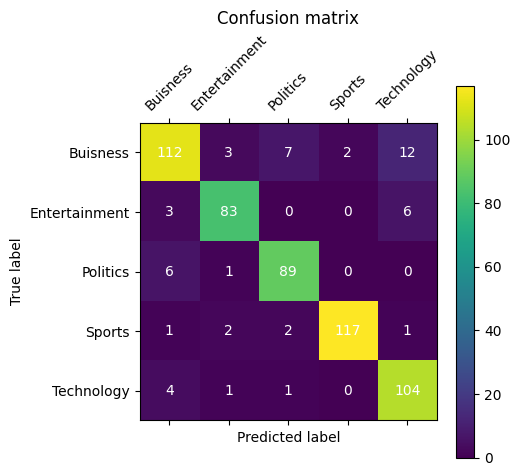

In [27]:
cm = confusion_matrix(Y_test, Y_pred)



print('Confusion matrix:')
print(cm)

# Print the classification report
class_names = ['Buisness','Entertainment','Politics','Sports','Technology']
report = classification_report(Y_test, Y_pred, target_names=class_names)
print('Classification report:')
print(report)
print()
print()
print()
print()


# Plot confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

# Add text annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()

## Desicion Tree Classifier:

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth = 20)
model3 = clf.fit(X_train, Y_train)

In [29]:
Y_pred = model3.predict(X_test)

Confusion matrix:
[[115   3   8   6   4]
 [  0  79   8   3   2]
 [  8   3  84   1   0]
 [  2   2   1 118   0]
 [  9   3   6   1  91]]
Classification report:
               precision    recall  f1-score   support

     Buisness       0.86      0.85      0.85       136
Entertainment       0.88      0.86      0.87        92
     Politics       0.79      0.88      0.83        96
       Sports       0.91      0.96      0.94       123
   Technology       0.94      0.83      0.88       110

     accuracy                           0.87       557
    macro avg       0.87      0.87      0.87       557
 weighted avg       0.88      0.87      0.87       557







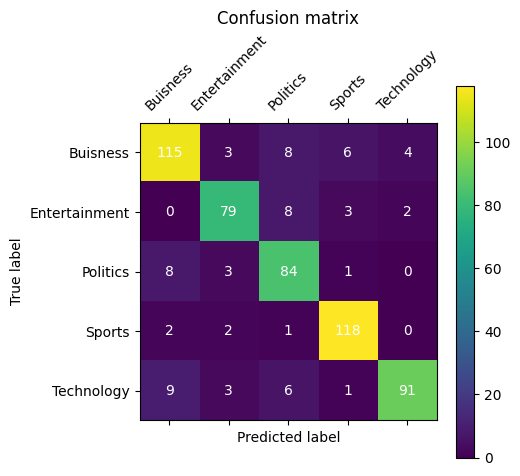

In [30]:
cm = confusion_matrix(Y_test, Y_pred)



print('Confusion matrix:')
print(cm)

# Print the classification report
class_names = ['Buisness','Entertainment','Politics','Sports','Technology']
report = classification_report(Y_test, Y_pred, target_names=class_names)
print('Classification report:')
print(report)
print()
print()
print()
print()


# Plot confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

# Add text annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()

## K-Neighbour Classifier:

In [31]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
model4 = neigh.fit(X_train, Y_train)

In [32]:
Y_pred = model4.predict(X_test)

Confusion matrix:
[[ 98   1   6  30   1]
 [  0  65   1  26   0]
 [  4   2  68  22   0]
 [  0   0   0 123   0]
 [ 11   5   6  47  41]]
Classification report:
               precision    recall  f1-score   support

     Buisness       0.87      0.72      0.79       136
Entertainment       0.89      0.71      0.79        92
     Politics       0.84      0.71      0.77        96
       Sports       0.50      1.00      0.66       123
   Technology       0.98      0.37      0.54       110

     accuracy                           0.71       557
    macro avg       0.81      0.70      0.71       557
 weighted avg       0.81      0.71      0.71       557







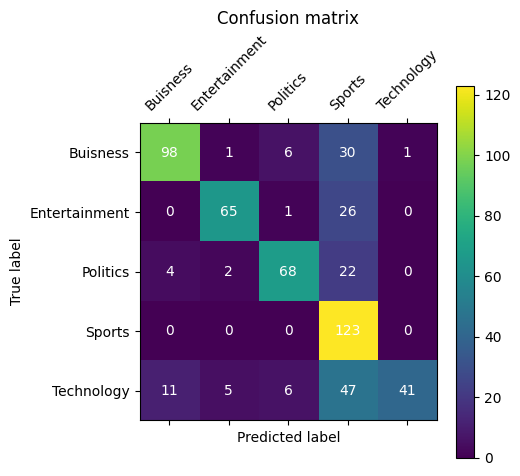

In [33]:
cm = confusion_matrix(Y_test, Y_pred)



print('Confusion matrix:')
print(cm)

# Print the classification report
class_names = ['Buisness','Entertainment','Politics','Sports','Technology']
report = classification_report(Y_test, Y_pred, target_names=class_names)
print('Classification report:')
print(report)
print()
print()
print()
print()


# Plot confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

# Add text annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()















## Radom Forest Classifier:

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=7, random_state=0)
model5 = clf.fit(X_train, Y_train)

In [35]:
Y_pred = model5.predict(X_test)

Confusion matrix:
[[133   0   2   0   1]
 [  4  81   1   6   0]
 [  5   0  88   3   0]
 [  2   0   1 120   0]
 [  5   0   1   6  98]]
Classification report:
               precision    recall  f1-score   support

     Buisness       0.89      0.98      0.93       136
Entertainment       1.00      0.88      0.94        92
     Politics       0.95      0.92      0.93        96
       Sports       0.89      0.98      0.93       123
   Technology       0.99      0.89      0.94       110

     accuracy                           0.93       557
    macro avg       0.94      0.93      0.93       557
 weighted avg       0.94      0.93      0.93       557







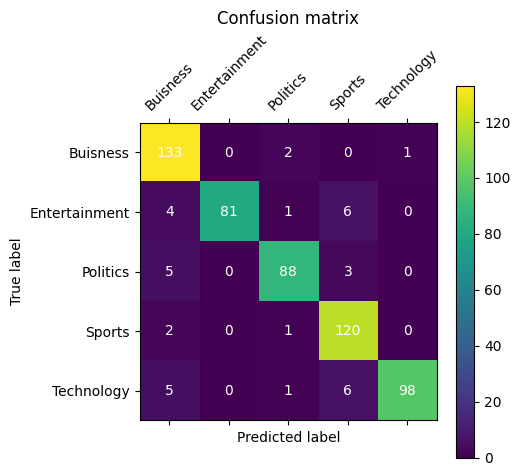

In [36]:
cm = confusion_matrix(Y_test, Y_pred)



print('Confusion matrix:')
print(cm)

# Print the classification report
class_names = ['Buisness','Entertainment','Politics','Sports','Technology']
report = classification_report(Y_test, Y_pred, target_names=class_names)
print('Classification report:')
print(report)
print()
print()
print()
print()


# Plot confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

# Add text annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()

### Using TF-IDF:

In [38]:
# GET FEATURES
X_train,X_test,feature_transformer=extract_features(df,"Article",training_data,testing_data)

### Logistic Regression:

[LibLinear]Confusion matrix:
[[131   1   3   0   1]
 [  2  89   1   0   0]
 [  2   0  93   0   1]
 [  0   0   1 122   0]
 [  3   0   1   2 104]]
Classification report:
               precision    recall  f1-score   support

     Buisness       0.95      0.96      0.96       136
Entertainment       0.99      0.97      0.98        92
     Politics       0.94      0.97      0.95        96
       Sports       0.98      0.99      0.99       123
   Technology       0.98      0.95      0.96       110

     accuracy                           0.97       557
    macro avg       0.97      0.97      0.97       557
 weighted avg       0.97      0.97      0.97       557







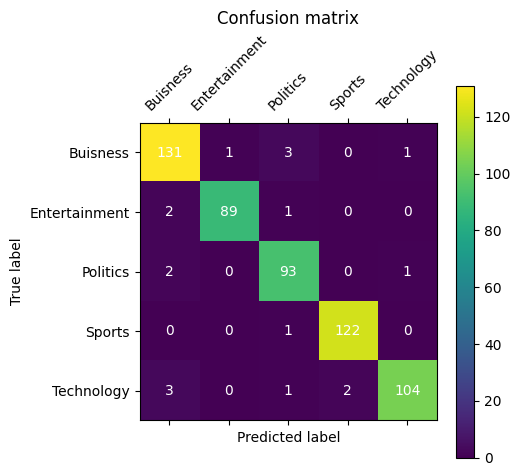

In [39]:
log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
model = log_reg.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)



print('Confusion matrix:')
print(cm)

# Print the classification report
class_names = ['Buisness','Entertainment','Politics','Sports','Technology']
report = classification_report(Y_test, Y_pred, target_names=class_names)
print('Classification report:')
print(report)
print()
print()
print()
print()


# Plot confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

# Add text annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()

### Naive Bayes Model:

Confusion matrix:
[[123   1   8   0   4]
 [  1  86   1   0   4]
 [  3   0  92   1   0]
 [  1   0   4 118   0]
 [  4   0   1   0 105]]
Classification report:
               precision    recall  f1-score   support

     Buisness       0.93      0.90      0.92       136
Entertainment       0.99      0.93      0.96        92
     Politics       0.87      0.96      0.91        96
       Sports       0.99      0.96      0.98       123
   Technology       0.93      0.95      0.94       110

     accuracy                           0.94       557
    macro avg       0.94      0.94      0.94       557
 weighted avg       0.94      0.94      0.94       557







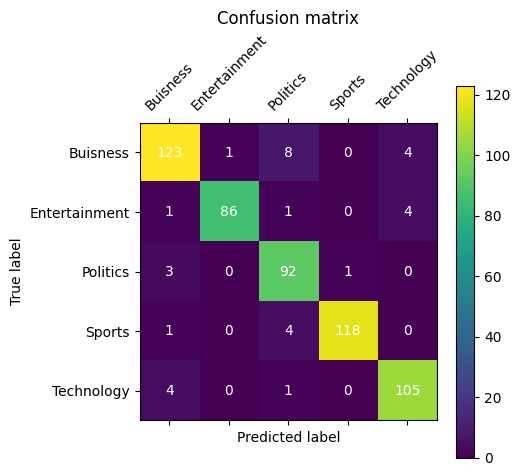

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB();
model2 = gnb.fit(X_train.toarray(), Y_train)
Y_pred = model2.predict(X_test.toarray())
cm = confusion_matrix(Y_test, Y_pred)



print('Confusion matrix:')
print(cm)

# Print the classification report
class_names = ['Buisness','Entertainment','Politics','Sports','Technology']
report = classification_report(Y_test, Y_pred, target_names=class_names)
print('Classification report:')
print(report)
print()
print()
print()
print()


# Plot confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

# Add text annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()

### Decision Tree Classifier:

Confusion matrix:
[[113   2   8   6   7]
 [  2  77   8   2   3]
 [  9   4  81   2   0]
 [  1   1   1 120   0]
 [  4   6   9   4  87]]
Classification report:
               precision    recall  f1-score   support

     Buisness       0.88      0.83      0.85       136
Entertainment       0.86      0.84      0.85        92
     Politics       0.76      0.84      0.80        96
       Sports       0.90      0.98      0.93       123
   Technology       0.90      0.79      0.84       110

     accuracy                           0.86       557
    macro avg       0.86      0.86      0.85       557
 weighted avg       0.86      0.86      0.86       557







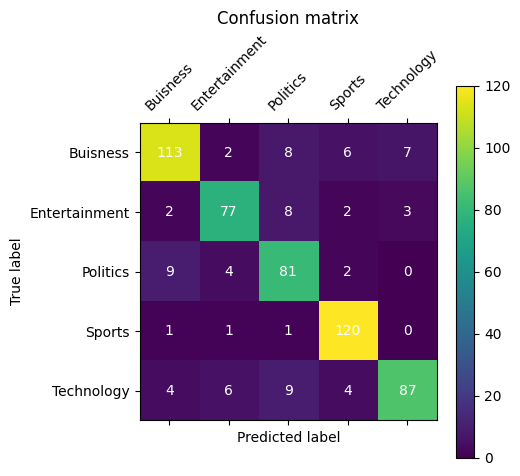

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth = 20)
model3 = clf.fit(X_train, Y_train)
Y_pred = model3.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)



print('Confusion matrix:')
print(cm)

# Print the classification report
class_names = ['Buisness','Entertainment','Politics','Sports','Technology']
report = classification_report(Y_test, Y_pred, target_names=class_names)
print('Classification report:')
print(report)
print()
print()
print()
print()


# Plot confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

# Add text annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()

### K-Neighbours Classifier:

Confusion matrix:
[[ 93   0  17  25   1]
 [  1  30  10  51   0]
 [  0   0  79  17   0]
 [  0   0   2 121   0]
 [  2   1  28  59  20]]
Classification report:
               precision    recall  f1-score   support

     Buisness       0.97      0.68      0.80       136
Entertainment       0.97      0.33      0.49        92
     Politics       0.58      0.82      0.68        96
       Sports       0.44      0.98      0.61       123
   Technology       0.95      0.18      0.31       110

     accuracy                           0.62       557
    macro avg       0.78      0.60      0.58       557
 weighted avg       0.78      0.62      0.59       557







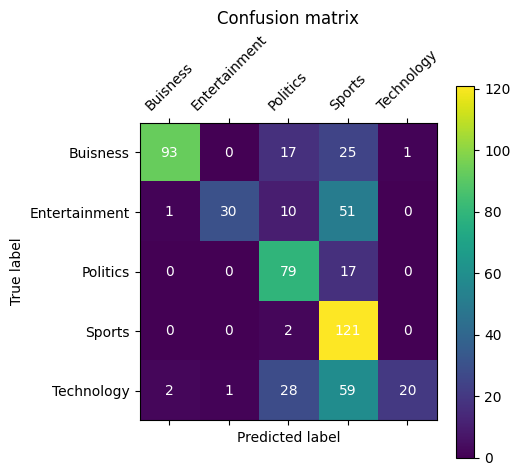

In [43]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
model4 = neigh.fit(X_train, Y_train)
Y_pred = model4.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)



print('Confusion matrix:')
print(cm)

# Print the classification report
class_names = ['Buisness','Entertainment','Politics','Sports','Technology']
report = classification_report(Y_test, Y_pred, target_names=class_names)
print('Classification report:')
print(report)
print()
print()
print()
print()


# Plot confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

# Add text annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()

### Random Forest Classifier:

Confusion matrix:
[[133   0   1   0   2]
 [  5  84   0   3   0]
 [  6   0  86   3   1]
 [  2   0   1 120   0]
 [  6   0   1   6  97]]
Classification report:
               precision    recall  f1-score   support

     Buisness       0.88      0.98      0.92       136
Entertainment       1.00      0.91      0.95        92
     Politics       0.97      0.90      0.93        96
       Sports       0.91      0.98      0.94       123
   Technology       0.97      0.88      0.92       110

     accuracy                           0.93       557
    macro avg       0.94      0.93      0.93       557
 weighted avg       0.94      0.93      0.93       557







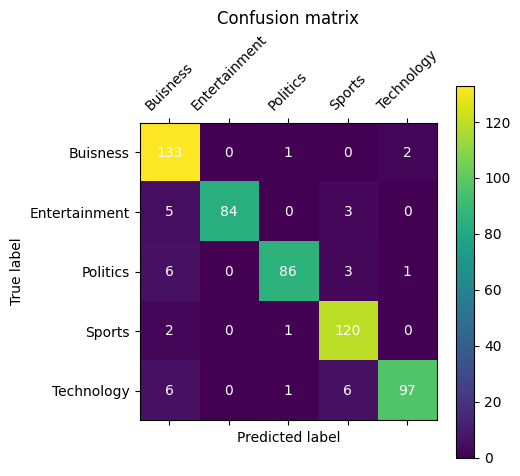

In [44]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=7, random_state=0)
model5 = clf.fit(X_train, Y_train)
Y_pred = model5.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)



print('Confusion matrix:')
print(cm)

# Print the classification report
class_names = ['Buisness','Entertainment','Politics','Sports','Technology']
report = classification_report(Y_test, Y_pred, target_names=class_names)
print('Classification report:')
print(report)
print()
print()
print()
print()


# Plot confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

# Add text annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()

### Model Performace comparison on the basis of accuracy:
Logistic Regression: BOW-0.96, TF-IDF-0.97  
Naive Bayes: BOW-0.94, TF-IDF-0.94  
Random Forest Classifier: BOW-0.93, TF-IDF-0.93  
Decision Tree Classifier: BOW-0.86, TF-IDF- 0.87  
K-Neighbours Classifier: BOW-0.71, TF-IDF-0.62

We can see here that Logistic regression performed better here than other models followed by naive bayes.

### Question & Answers:


1.   How many news articles are present in the dataset that we have?  
Ans: There are 2225 articles in our dataset.
2.   Most of the news articles are from 'Sports' category
3.   Only 401 no. of articles belong to the 'Technology' category.
4.   What are Stop Words and why should they be removed from the text data?  
Ans: Stop words are the words that commonly appear in natural language, such as "the", "a", "an", "in", etc. They are usually considered to be irrelevant or insignificant for the meaning or analysis of the text. Therefore, they are often removed or excluded from the text data before or after processing it in natural language processing (NLP).
Removing stop words can have several benefits, such as:

  •  Reducing the size of the text data and saving space and time in processing it.

  •  Focusing on the words that carry more information and meaning for the text.

  •  Improving the performance and accuracy of some methods and algorithms that rely on word frequencies or word order.
5.  Explain the difference between Stemming and Lemmatization.  
Ans: Stemming and lemmatization are two techniques that are used to reduce the number of words.  
•  Stemming is a process that removes the suffixes or prefixes of a word, such as -ing, -ed, -s, etc. For example, the words running, runs, and ran can be stemmed to run. Stemming is a simple and fast method that can reduce the size of the text data and make it easier to process.  

  •  Lemmatization is a process that uses a dictionary or a corpus to find the lemma or the canonical form of a word based on its meaning and context. For example, the word better can be lemmatized to good, which is its lemma. Lemmatization is a more accurate and sophisticated method that can preserve the semantic information of the text data and produce valid words.
6. Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?  
Ans: There is no definitive answer to which one is better, as different techniques may work better for different datasets and tasks. In our model also, both techniques are providing almost same accuracies.
7. What's the shape of train & test data sets after performing a 75:25 split.  
Ans: Training data shape- (1668,2)
     Testing data shape- (557,2)
8. Which of the following is found to be the best performing model..  
a. Random Forest b. Nearest Neighbors c. Naive Bayes  
Ans: In our case Random Forest and Naive Bayes outperformed the nearest neighbour classifier.
9. According to this particular use case, both precision and recall are equally important. (T/F)  
Ans: True. In our case, both precision and recall can be important metrics to evaluate our models. We want to avoid both types of errors in our project, as they can affect the quality and usefulness of our models. For example, if we have too many false positives, we might mislead your users or customers who rely on our models to find relevant information or insights about a certain topic or category. If we have too many false negatives, we might miss some valuable information or insights that could be useful for our users or customers.


